# Projeto - Machine Learning I

## Exploração do dataset

### O que é o Index de Popularidade do Spotify?

O Índice de Popularidade do Spotify é um valor entre 0 e 100 que ranqueia quão popular um artista é relativo a outros artistas. Quanto maior o valor, mais destaque em listas editoriais e acréscimo nas recomendações de playlists algorítmicas.

O índice pode ser usado para monitorar e influenciar o progresso de novos lançamentos. Cada música tem seu próprio valor de índice calculado, influenciando no índice total do artista. No entanto, embora o Índice de Popularidade seja principalmente determinado pelo número recente de reproduções, outros fatores como taxa de salvamento, número de playlists, taxa de pulos e taxa de compartilhamento podem indiretamente aumentar ou diminuir o índice de popularidade de uma música.

Fonte: https://www.loudlab.org/blog/spotify-popularity-leverage-algorithm/#:~:text=The%20Spotify%20Popularity%20Index%20is,on%20algorithmic%20playlists%20and%20recommendations



#### Informação do kaggle:

Column Description
- <b>track_id:</b> The Spotify ID for the track
- <b>artists:</b> The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- <b>track_name:</b> Name of the track
- <b>popularity:</b> The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- <b>duration_ms:</b> The track length in milliseconds
- <b>explicit:</b> Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- <b>danceability:</b> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- <b>energy:</b> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- <b>key:</b> The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- <b>loudness:</b> The overall loudness of a track in decibels (dB)
- <b>mode:</b> Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- <b>speechiness:</b> Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- <b>acousticness:</b> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- <b>instrumentalness:</b> Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- <b>liveness:</b> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- <b>valence:</b> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- <b>tempo:</b> The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- <b>time_signature:</b> An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- <b>track_genre:</b> The genre in which the track belongs

Link pro dataset: https://www.kaggle.com/code/vatsalmavani/music-recommendation-system-using-spotify-dataset/input 

In [2]:
# Import das principais bibliotecas para explorar o dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import preprocessing, pipeline, kfold, gridsearch
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures

# Import de modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Import de métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

In [3]:
# Dataset a partir do link raw, hospedado no github (evita a necessidade de ter o dataset na máquina).
music = pd.read_csv("https://raw.githubusercontent.com/fernandobrancher/project_machine_learning_i/main/music.csv")
music.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


#### Algumas informações sobre o dataset:

- 19 colunas
    - 1 coluna id
    - 2 colunas de strings com informações da música: artistas e nome
    - target: popularity


- 170.653 músicas

#### Analise dos dados do Dataset

In [3]:
print(music.shape)
music.info()

(170653, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release

In [4]:
# Dataset sem valores nulos
music.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [4]:
music.duplicated(subset = 'id').value_counts()

False    170653
Name: count, dtype: int64

O dataset não possui dados faltantes e todos os registros são únicos, não há duplicatas.

### Análise Exploratória

In [6]:
music.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


As colunas numéricas são apresentadas em grandezas diferentes (principalmente duração, tempo e popularidade).

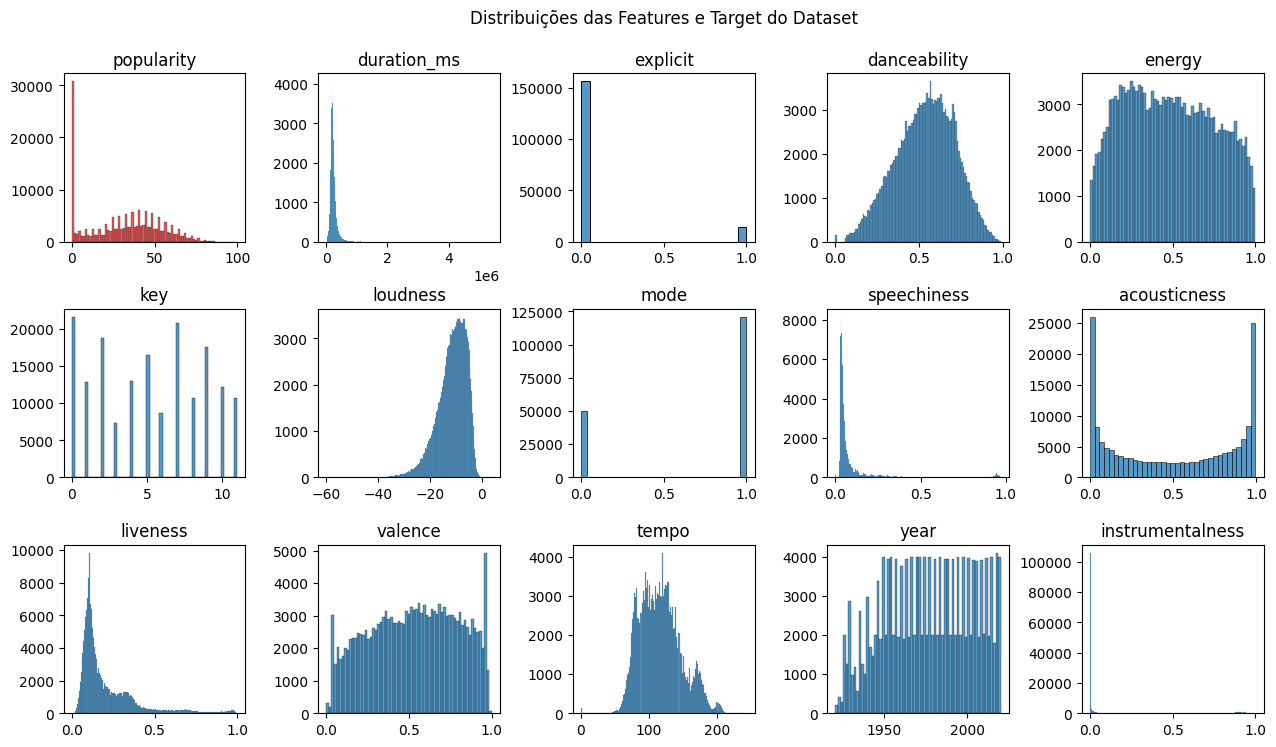

In [7]:
# Gráfico de distribuição das features
categories = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key',
              'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence',
              'tempo', "year", 'instrumentalness']


fig = plt.figure(figsize=(15,8))

for number, category in enumerate(categories, start=1):
    if category == 'popularity':
        ax = fig.add_subplot(3,5,number)
        sns.histplot(data=music, x=category, color='tab:red')
        plt.title(category)
        ax.set_ylabel('')
        ax.set_xlabel('')
    else:
        ax = fig.add_subplot(3,5,number)
        sns.histplot(data=music, x=category)
        plt.title(category)
        ax.set_ylabel('')
        ax.set_xlabel('')      

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Distribuições das Features e Target do Dataset')
plt.show()

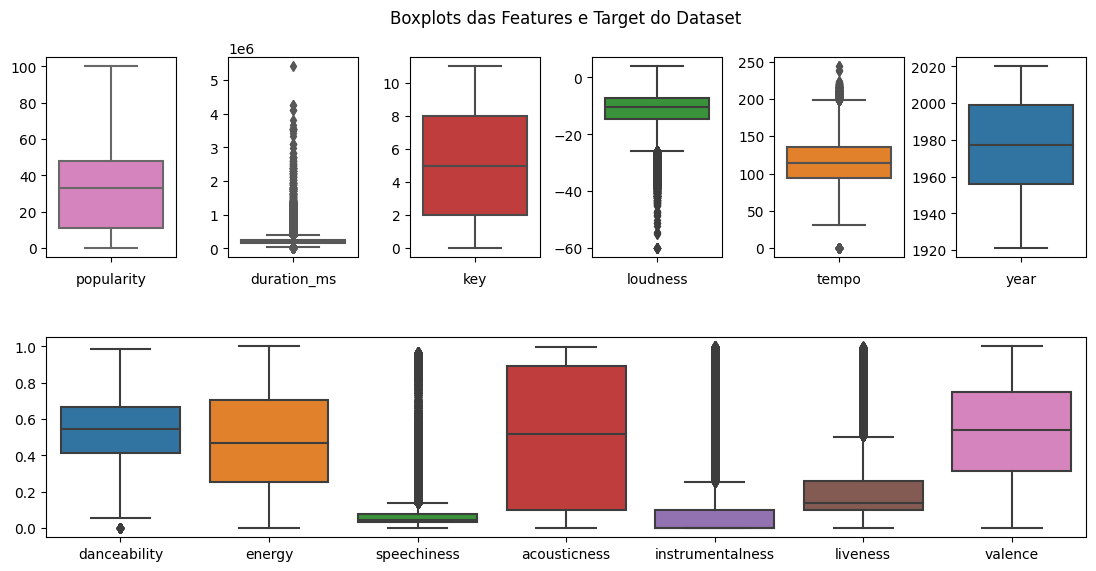

In [8]:
# Boxplot das features
tech_categories = music[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
categories = ['popularity', 'duration_ms', 'key', 'loudness', 'tempo', 'year']
colors = {6:'tab:blue', 5:'tab:orange', 4:'tab:green', 3:'tab:red', 2:'tab:purple', 1:'tab:pink'}

fig= plt.figure(figsize=(13,6))

for number, category in enumerate(categories, start=1):
    ax = fig.add_subplot(2,6,number)
    sns.boxplot(data=music, y=category, color=colors[number])
    plt.xlabel(category)
    ax.set_ylabel('')
    
fig.add_subplot(2,1,2)
sns.boxplot(data=tech_categories)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Boxplots das Features e Target do Dataset')
plt.show()

#### Correlação entre as features

No mapa de calor abaixo são apresentadas as correlações entre as variáveis.

Focando na relação das demais features com o nosso target (popularidade), é possível notar que as variáveis que apresentam maior destaque são:
- year
- acoustiness
- energy
- loudness

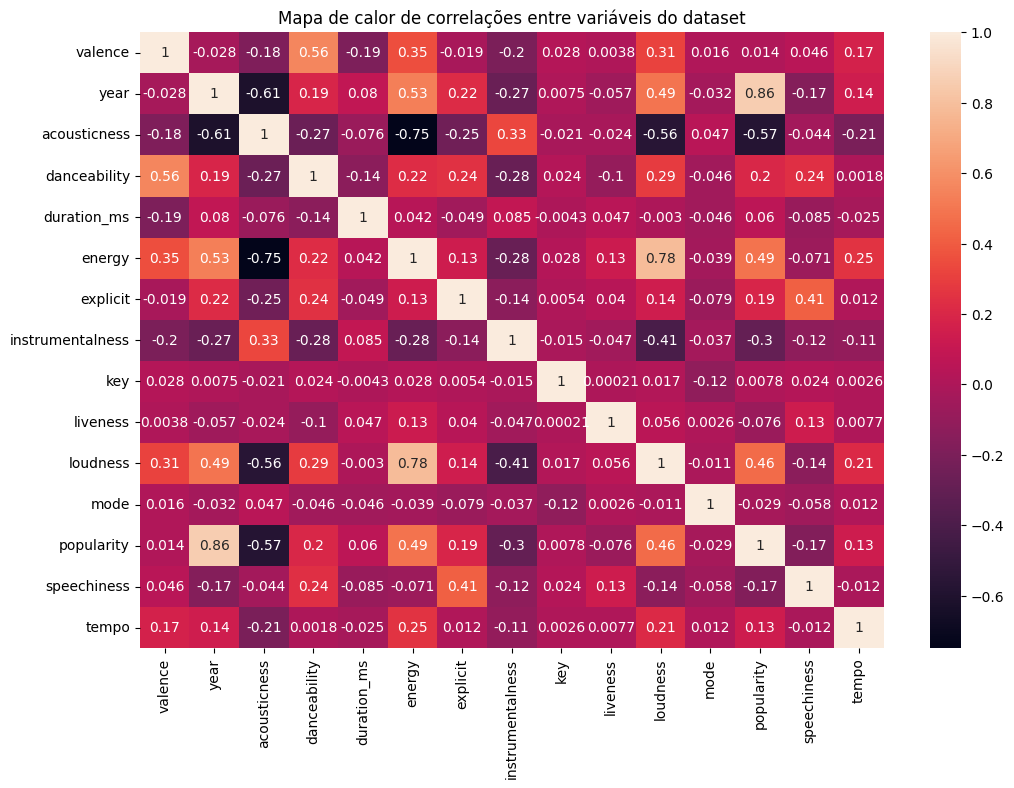

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(music.corr(numeric_only=True), annot=True)
plt.title('Mapa de calor de correlações entre variáveis do dataset')
plt.show()

#### Analisando a target Popularidade

Top 10 músicas, em popularidade, que estão no dataset.

In [13]:
music[['year', 'artists', 'name', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

,year,artists,name,popularity
19611,2020,"['Bad Bunny', 'Jhay Cortez']",Dakiti,100
19606,2020,"['24kGoldn', 'iann dior']",Mood (feat. iann dior),99
19618,2020,['BTS'],Dynamite,97
19608,2020,"['Cardi B', 'Megan Thee Stallion']",WAP (feat. Megan Thee Stallion),96
19610,2020,['Ariana Grande'],positions,96
19612,2020,['Pop Smoke'],What You Know Bout Love,96
19616,2020,['The Weeknd'],Blinding Lights,96
19607,2020,"['Pop Smoke', 'Lil Baby', 'DaBaby']",For The Night (feat. Lil Baby & DaBaby),95
19615,2020,"['Justin Bieber', 'Chance the Rapper']",Holy (feat. Chance The Rapper),95
19620,2020,"['Justin Bieber', 'benny blanco']",Lonely (with benny blanco),95


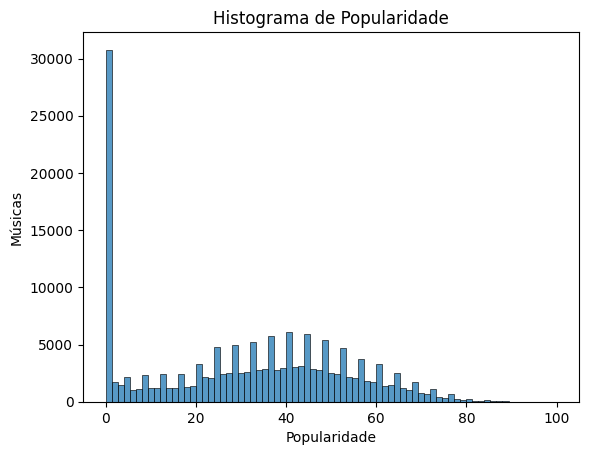

In [55]:
sns.histplot(data=music, x='popularity')
plt.title('Histograma de Popularidade')
plt.ylabel('Músicas')
plt.xlabel('Popularidade')
plt.show()

Divisão de popularidade por categorias:

Popularity 81 - 100: 549


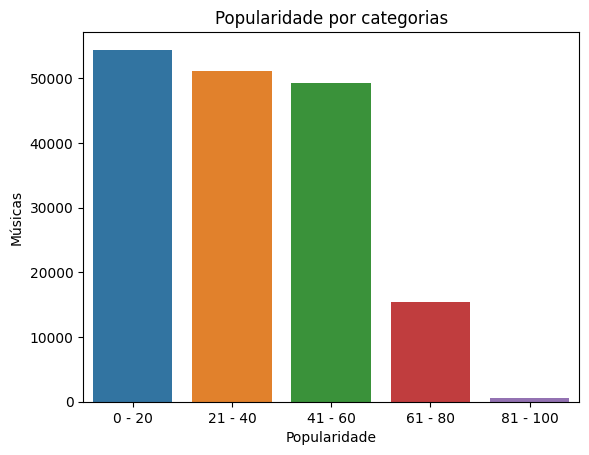

In [38]:
# Dividir popularity em categorias: 0-20, 21-40, 41-60, 61-80, 81-100

music['pop_categories'] = pd.cut(music['popularity'],
                                 bins=5,
                                 labels=['0 - 20', '21 - 40', '41 - 60', '61 - 80', '81 - 100'])

print(f'Popularity 81 - 100: {music["pop_categories"].value_counts()["81 - 100"]}')
sns.countplot(data=music, x='pop_categories')
plt.title('Popularidade por categorias')
plt.ylabel('Músicas')
plt.xlabel('Popularidade')
plt.show()

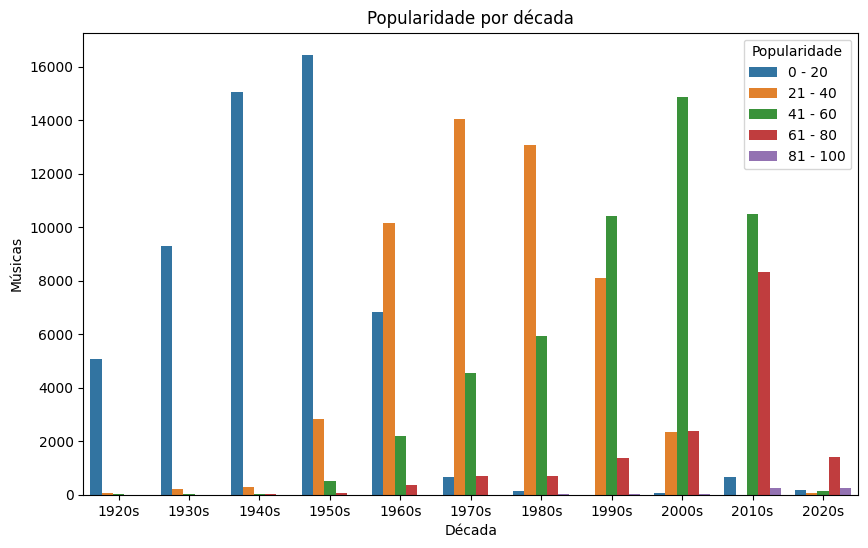

In [58]:
def decade(year):
    decade = (year // 10) * 10
    return f'{decade}s'

music['decade'] = music['year'].apply(decade)

plt.figure(figsize=(10,6))
sns.countplot(data=music, x='decade', hue='pop_categories')
plt.xlabel('Década')
plt.ylabel('Músicas')
plt.title('Popularidade por década')
plt.legend(title='Popularidade')
plt.show()

#### Dataset filtrado: Popularidade 0

Devido a um número bastante expressivo de músicas com popularidade 0, decidimos explorar um pouco para ver se trazia alguns insights, segue abaixo um resumo do que analisado:

In [14]:
popularity_0 = music[music["popularity"] == 0]

In [15]:
# Porcentagem de musicas com popularidade 0.
perc = popularity_0.shape[0]/music.shape[0] * 100
print(f'Porcentagem de músicas com popularidade 0: {round(perc, 2)}%')

Porcentagem de músicas com popularidade 0: 16.34%


In [16]:
popularity_0.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,27892.000000,27892.000000,27892.000000,27892.000000,2.789200e+04,27892.000000,27892.000000,27892.000000,27892.000000,27892.000000,27892.000000,27892.000000,27892.0,27892.000000,27892.000000
mean,0.510988,1942.600065,0.850163,0.503406,2.144083e+05,0.271674,0.088054,0.347839,5.200416,0.223285,-15.172543,0.695791,0.0,0.192032,108.701879
std,0.267299,14.178548,0.263625,0.179986,1.569471e+05,0.181303,0.283378,0.391124,3.505614,0.163995,5.677334,0.460080,0.0,0.291706,31.061990
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.0,0.000000,0.000000
25%,0.293000,1934.000000,0.866750,0.366000,1.488595e+05,0.142000,0.000000,0.000034,2.000000,0.111000,-18.728000,0.000000,0.0,0.041500,82.704000
50%,0.535000,1942.000000,0.974000,0.506000,1.849730e+05,0.234000,0.000000,0.085050,5.000000,0.158000,-14.746500,1.000000,0.0,0.056600,106.849500
75%,0.730000,1949.000000,0.992000,0.654000,2.138130e+05,0.358000,0.000000,0.820000,8.000000,0.293000,-10.968000,1.000000,0.0,0.136000,127.956000
max,1.000000,2020.000000,0.996000,0.983000,3.569933e+06,1.000000,1.000000,0.999000,11.000000,0.988000,3.855000,1.000000,0.0,0.970000,221.741000


Após plotar as distribuições do dataset popularity_0, muito se permaneceu na mesma tendência. Entretanto, visualmente, o que apresentou uma mudança mais destacada foram as features relativas ao ano e energia, como é possível ver abaixo. Este fato reforça, junto à tabela de correlação, que estas features são bastante decisivas, já que ao filtrar as musicas de popularidade nula, a distribuição se concetra em baixos valores para energia e um período mais antigo para o ano.

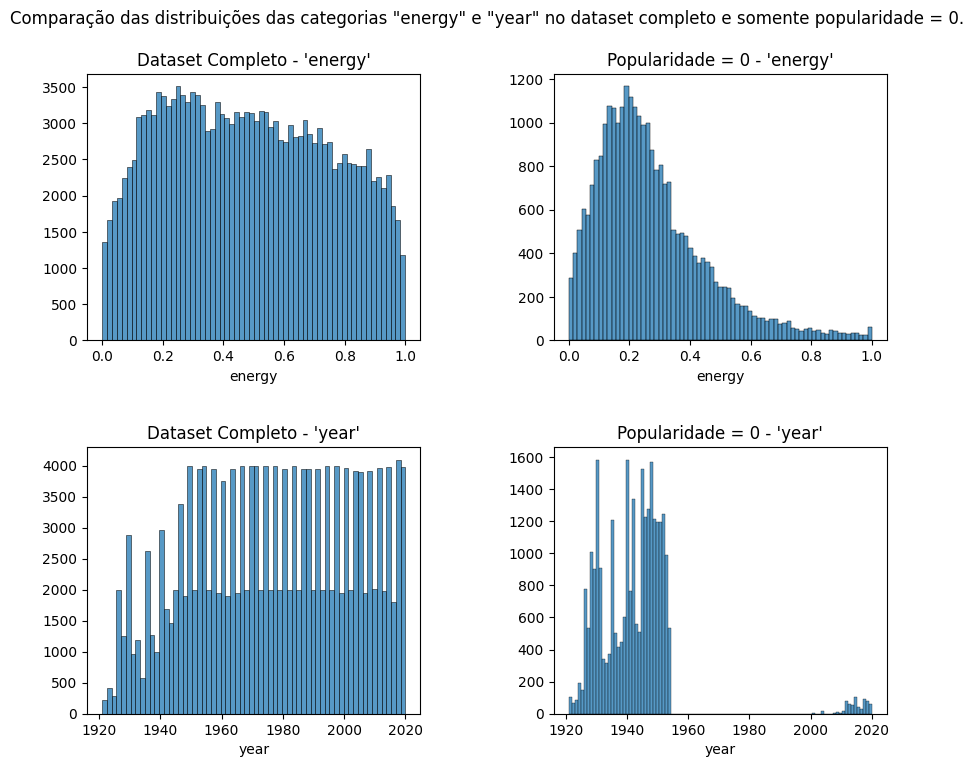

In [17]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2,2,1)
sns.histplot(data=music, x="energy")
plt.title("Dataset Completo - 'energy'")
ax1.set_ylabel('')

ax2 = fig.add_subplot(2,2,2)
sns.histplot(data=popularity_0, x="energy")
plt.title("Popularidade = 0 - 'energy'")
ax2.set_ylabel('')

ax3 = fig.add_subplot(2,2,3)
sns.histplot(data=music, x="year")
plt.title("Dataset Completo - 'year'")
ax3.set_ylabel('')

ax4 = fig.add_subplot(2,2,4)
sns.histplot(data=popularity_0, x="year")
plt.title("Popularidade = 0 - 'year'")
ax4.set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Comparação das distribuições das categorias "energy" e "year" no dataset completo e somente popularidade = 0.')
plt.show()

**Comentário:** O gráfico abaixo foi utilizado para explorar a relação entre o ano e a popularidade, pois o quarto gráfico acima sugere que as músicas antigas **poderiam** não ter sido classificadas com popularidade, já que há muitas com valor 0. Entretanto, no gráfico abaixo é possível ver que isso não se confirma. 

De qualquer forma, optmaos em deixar o gráfico, pois nele fica claro que conforme os anos vão avançando as valores de popularidade também vão aumentando. Apenas o ano de 2020 que apresenta valores dispersos para a popularidade. 

Com isso, algumas pertguntas foram formuladas: como foi feita a seleção de musicas para o dataset? De forma aleatória, estratificada ou por algum filtro? Tal indagação surge do fato que desde as décadas de 50-60 até os anos 2000, não parece ter nenhuma música com popularidade inferior a uns 10 pontos.

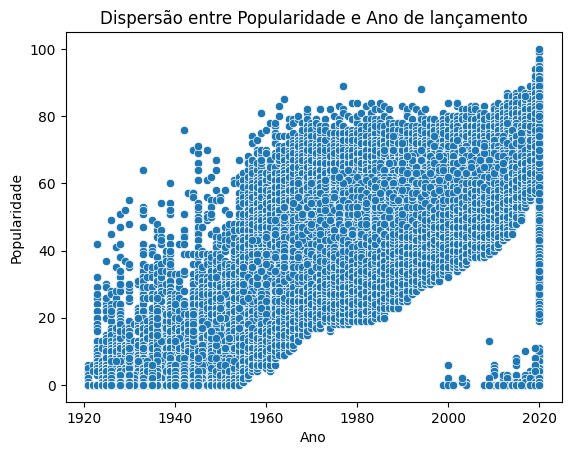

In [56]:
sns.scatterplot(y=music["popularity"], x=music["year"])
plt.title('Dispersão entre Popularidade e Ano de lançamento')
plt.ylabel('Popularidade')
plt.xlabel('Ano')
plt.show()

#### Feature Selection

Baseado nas análises acima, optou-se em remover as seguintes colunas:
- artista, nome e id da música: não serão utilizados no modelo
- release_date: traz a mesma informação que a coluna "year"

Além disso, foi feita uma seleção de features para os modelos de acordo com valores de correlação com a target 'popularity'

Features selecioandas:
- Correlação <= -0.1 (acousticness, instrumentalness, speechiness)
- Correlação >= 0.1 (year, danceability, energy, explicit, loudness, tempo)

In [60]:
# Dataset após feature selection

# Exclusão de colunas não relevantes para o modelo, redundantes (release_date), ou criadas para análise exploratória:
music_model = music.drop(['artists', 'id', 'name', 'release_date', 'pop_categories', 'decade'], axis=1)

# Exclusão de colunas com baixa correlação com a target: 
music_model = music_model.drop(['valence', 'duration_ms', 'key', 'liveness', 'mode'], axis=1)
music_model.head(3) 

,year,acousticness,danceability,energy,explicit,instrumentalness,loudness,popularity,speechiness,tempo
0,1921,0.982,0.279,0.211,0,0.878,-20.096,4,0.0366,80.954
1,1921,0.732,0.819,0.341,0,0.000,-12.441,5,0.4150,60.936
2,1921,0.961,0.328,0.166,0,0.913,-14.850,5,0.0339,110.339


## Machine Learning

Abaixo são desenvolvidos alguns modelos de regressão, são eles:
- 1. Regressão Linear e Polinomial
- 2. Decision Tree Regressor (Árvore de Decisão)
- 3. Gradient Boosting Regressor

Para estes modelos foi realizada uma feature selection, onde permnaeceram apenas as colunas que tiveram correlação menor que -0.1 e maior que 0.1 com o target popularidade, criando assim um novo data frame (music_model).

As features que permaneceram para os modelos foram: `['year', 'acousticness', 'danceability', 'energy', 'explicit', 'instrumentalness', 'loudness', 'speechiness', 'tempo']`

In [4]:
X = music_model.drop('popularity', axis=1)
y = music['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Regressão Linear e Polinomial

In [5]:
# Linear Regression
steps1 = [('rb_scaler', RobustScaler()),
          ('poly_features', PolynomialFeatures()),
          ('lr', LinearRegression())]

pipe_lr = Pipeline(steps1)

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

metric1 = make_scorer(r2_score)
metric2 = make_scorer(mean_squared_error)

param_grid = {
    'poly_features__degree': range(1,6),
    'poly_features__interaction_only': [False, True],
    'poly_features__include_bias': [False, True],
    'poly_features__order': ['C', 'F'],
}

grid_lr = GridSearchCV(estimator=pipe_lr,
                           param_grid=param_grid,
                           scoring={'r2': metric1, 'mse': metric2},
                           cv=splitter,
                           refit='r2', #mse ou r2 faz pouca diferença aqui. Padronizei para r2 em todas as análises.
                           n_jobs=-1,
                           verbose=10)

grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rb_scaler', RobustScaler()),
                                       ('poly_features', PolynomialFeatures()),
                                       ('lr', LinearRegression())]),
             n_jobs=-1,
             param_grid={'poly_features__degree': [4],
                         'poly_features__include_bias': [False, True],
                         'poly_features__interaction_only': [False, True],
                         'poly_features__order': ['C', 'F']},
             refit='r2',
             scoring={'mse': make_scorer(mean_squared_error),
                      'r2': make_scorer(r2_score)},
             verbose=10)

In [6]:
grid_lr.best_params_

{'poly_features__degree': 4,
 'poly_features__include_bias': True,
 'poly_features__interaction_only': False,
 'poly_features__order': 'C'}

In [7]:
ylr_pred_test = grid_lr.predict(X_test)
ylr_pred_train = grid_lr.predict(X_train)

In [8]:
print('Métricas para Regressão Linear')
results = {'Treino/Teste': ['y_pred_train', 'y_pred_test'],
           'R2': [r2_score(y_train, ylr_pred_train), r2_score(y_test, ylr_pred_test)],
           'MAE': [mean_absolute_error(y_train, ylr_pred_train), mean_absolute_error(y_test, ylr_pred_test)],
           'MSE' : [mean_squared_error(y_train, ylr_pred_train), mean_squared_error(y_test, ylr_pred_test)]}

pd.DataFrame(results)

Métricas para Regressão Linear


,Treino/Teste,R2,MAE,MSE
0,y_pred_train,0.787385,7.226995,101.176621
1,y_pred_test,0.792390,7.187713,99.345079


### 2. Decision Tree (Árvore de Decisão)

In [21]:
# Cuidar pra não rodar de novo se não for necessário!

# Decision Tree Regressor
steps2 = [('rb_scaler', RobustScaler()),
         ('dt', DecisionTreeRegressor(random_state=42))]

pipe_dt = Pipeline(steps2)

params_grid_dt = {
    "dt__criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "dt__splitter": ["best", "random"],
    "dt__max_depth": range(3, 10)
}

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

metric1 = make_scorer(r2_score)
metric2 = make_scorer(mean_squared_error)

grid_dt = GridSearchCV(
    estimator=pipe_dt,
    param_grid=params_grid_dt,
    scoring={'r2': metric1, 'mse': metric2},
    cv=splitter,
    refit='r2', #r2 melhor que mse
    n_jobs=-1,
    verbose=50,
)

grid_dt.fit(X_train, y_train)


Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rb_scaler', RobustScaler()),
                                       ('dt',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['squared_error', 'friedman_mse',
                                           'absolute_error', 'poisson'],
                         'dt__max_depth': range(3, 10),
                         'dt__splitter': ['best', 'random']},
             refit='r2',
             scoring={'mse': make_scorer(mean_squared_error),
                      'r2': make_scorer(r2_score)},
             verbose=50)

In [22]:
grid_dt.best_params_

{'dt__criterion': 'poisson', 'dt__max_depth': 8, 'dt__splitter': 'best'}

In [23]:
ydt_pred_test = grid_dt.predict(X_test)
ydt_pred_train = grid_dt.predict(X_train)

In [24]:
print('Métricas para Decision Tree')
results = {'Treino/Teste': ['y_pred_train', 'y_pred_test'],
           'R2': [r2_score(y_train, ydt_pred_train), r2_score(y_test, ydt_pred_test)],
           'MAE': [mean_absolute_error(y_train, ydt_pred_train), mean_absolute_error(y_test, ydt_pred_test)],
           'MSE' : [mean_squared_error(y_train, ydt_pred_train), mean_squared_error(y_test, ydt_pred_test)]}

pd.DataFrame(results)

Métricas para Decision Tree


,Treino/Teste,R2,MAE,MSE
0,y_pred_train,0.799639,6.847045,95.345236
1,y_pred_test,0.798265,6.874729,96.533576


### 3. Gradient Boosting Regressor

In [14]:
# Gradient Boosting Regressor
steps3 = [('rb_scaler', RobustScaler()),
         ('gb', GradientBoostingRegressor(random_state=42))]

pipe_gb = Pipeline(steps3)

params_grid_gb = {'gb__loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
                  'gb__learning_rate': np.linspace(0.001, 0.5, num=10),
                  'gb__n_estimators': np.arange(100, 500, 100),
                  'gb__criterion': ['friedman_mse', 'squared_error']}

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

metric1 = make_scorer(r2_score)
metric2 = make_scorer(mean_squared_error)

grid_gb = RandomizedSearchCV(
    estimator=pipe_gb,
    param_distributions=params_grid_gb,
    n_iter=40,
    scoring={'r2': metric1, 'mse': metric2},
    cv=splitter,
    refit='r2',
    n_jobs=-1,
    random_state=42,
    verbose=50,
)

grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('rb_scaler', RobustScaler()),
                                             ('gb',
                                              GradientBoostingRegressor(random_state=42))]),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'gb__criterion': ['friedman_mse',
                                                          'squared_error'],
                                        'gb__learning_rate': array([0.001     , 0.05644444, 0.11188889, 0.16733333, 0.22277778,
       0.27822222, 0.33366667, 0.38911111, 0.44455556, 0.5       ]),
                                        'gb__loss': ['squared_error',
                                                     'absolute_error', 'huber',
                                                     'quantile'],
                                        'gb__n_estimators': array([100, 200, 300, 400])},
                   random_state=42, refit='r2',
                   scoring={'mse': make_scorer(mean_squared_error),
                            'r2': make_scorer(r2_score)},
                   verbose=50)

In [15]:
ygb_pred_test = grid_gb.predict(X_test)
ygb_pred_train = grid_gb.predict(X_train)

In [16]:
grid_gb.best_params_

{'gb__n_estimators': 400,
 'gb__loss': 'squared_error',
 'gb__learning_rate': 0.16733333333333333,
 'gb__criterion': 'squared_error'}

In [20]:
print('Métricas para Gradient Boosting')
results = {'Treino/Teste': ['y_pred_train', 'y_pred_test'],
           'R2': [r2_score(y_train, ygb_pred_train), r2_score(y_test, ygb_pred_test)],
           'MAE': [mean_absolute_error(y_train, ygb_pred_train), mean_absolute_error(y_test, ygb_pred_test)],
           'MSE' : [mean_squared_error(y_train, ygb_pred_train), mean_squared_error(y_test, ygb_pred_test)]}

pd.DataFrame(results)

Métricas para Gradient Boosting


,Treino/Teste,R2,MAE,MSE
0,y_pred_train,0.808241,6.773011,91.252088
1,y_pred_test,0.805601,6.824332,93.023075


#### COMPARAÇÃO ENTRE OS MODELOS

In [10]:
print('Comparação entre os três modelos:')
results = {'Modelo': ['Linear Regression',
                      'Decision Tree',
                      'Gradient Boosting'],
           'R2': [0.792390, 0.798265, 0.805601],
           'MAE': [7.187713, 6.874729, 6.824332],
           'MSE' : [99.345079, 96.533576, 93.023075]}

pd.DataFrame(results).sort_values(by='R2', ascending=False)

Comparação entre os três modelos:


,Modelo,R2,MAE,MSE
2,Gradient Boosting,0.805601,6.824332,93.023075
1,Decision Tree,0.798265,6.874729,96.533576
0,Linear Regression,0.792390,7.187713,99.345079


## Curvas de Aprendizagem

#### Linear Regression

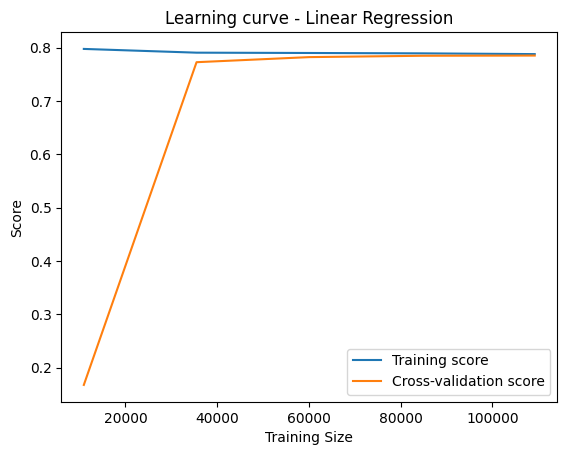

In [11]:
# Learning Curve Linear Regression

steps1 = [('rb_scaler', RobustScaler()),
          ('poly_features', PolynomialFeatures(degree=4,
                                               include_bias=True,
                                               interaction_only=False,
                                               order='C')),
          ('lr', LinearRegression())]

pipe_lr = Pipeline(steps1)

trainlr_sizes, trainlr_scores, vallr_scores = learning_curve(pipe_lr, X_train, y_train, cv=5, n_jobs=-1)

# Compute the mean of the scores
trainlr_scores_mean = np.mean(trainlr_scores, axis=1)
vallr_scores_mean = np.mean(vallr_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(trainlr_sizes, trainlr_scores_mean, label='Training score')
plt.plot(trainlr_sizes, vallr_scores_mean, label='Cross-validation score')
# plt.axis(ymin=0.74, ymax=0.76)
plt.title('Learning curve - Linear Regression')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

#### Decision Tree Regressor

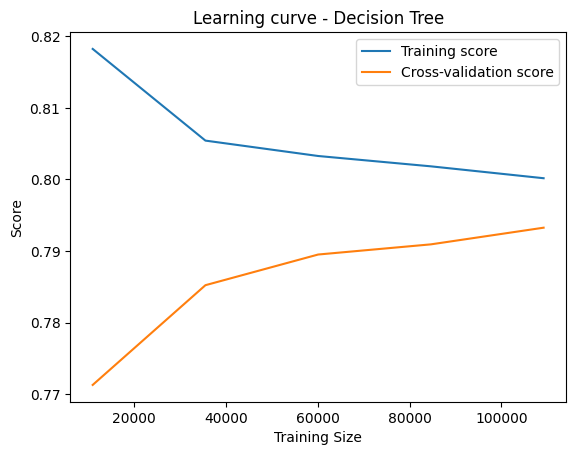

In [27]:
# Learning Curve Decision Tree

steps2 = [('rb_scaler', RobustScaler()),
         ('dt', DecisionTreeRegressor(criterion='poisson',
                                      max_depth=8,
                                      splitter='best',
                                      random_state=42))]

pipe_dt = Pipeline(steps2)

traindt_sizes, traindt_scores, valdt_scores = learning_curve(pipe_dt, X_train, y_train, cv=5, n_jobs=-1)

# Compute the mean of the scores
traindt_scores_mean = np.mean(traindt_scores, axis=1)
valdt_scores_mean = np.mean(valdt_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(traindt_sizes, traindt_scores_mean, label='Training score')
plt.plot(traindt_sizes, valdt_scores_mean, label='Cross-validation score')
plt.title('Learning curve - Decision Tree')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

#### Gradient Boosting Regressor

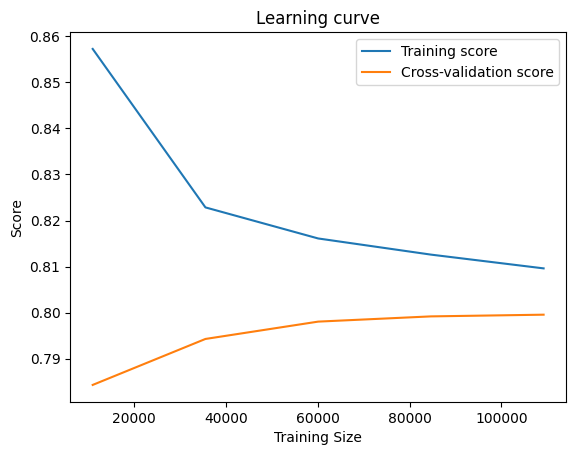

In [22]:
# Learning Curve Gradient Boosting

steps3 = [('rb_scaler', RobustScaler()),
         ('gb', GradientBoostingRegressor(n_estimators=400,
                                          loss='squared_error',
                                          learning_rate=0.16733333333333333,
                                          criterion='squared_error',
                                          random_state=42))]

pipe_gb = Pipeline(steps3)

traingb_sizes, traingb_scores, valgb_scores = learning_curve(pipe_gb, X_train, y_train, cv=5, n_jobs=-1)

# Compute the mean of the scores
traingb_scores_mean = np.mean(traingb_scores, axis=1)
valgb_scores_mean = np.mean(valgb_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(traingb_sizes, traingb_scores_mean, label='Training score')
plt.plot(traingb_sizes, valgb_scores_mean, label='Cross-validation score')
plt.title('Learning curve - Gradient Boosting')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

#### Análise das três curvas de aprendizagem:

De forma geral, os três gráficos acima apresentam resultados semelhantes quanto ao comportamento das curvas. Conforme o _training size_ aumenta, as curvas que indicam o desempenho dos dados de treino e teste (que passam por cross validation) tendem ao mesmo valor. Esse comportamento mostra que, independente dos dados, o modelo tem mesmo desempenho, podendo nos indicar que os modelos treinados não estão com overfitting. 

A diferença entre os dados de treino e teste giram em torno de:
- 0.002 para a Linear Regression
- 0.1 para a Decision Tree
- 0.002 para o Gradient Boosting